<h1 align="center">I4. Estudio de la amplitud de las oscilaciones armónicas amortiguadas y forzadas</h1>
<div align="right">Por David A. Miranda, PhD<br>2020</div>

En esta simulación se muestra la variación de la elongación de un péndulo de Pohl tres condiciones: sin perturbación externa, con perturbación externa y con amortiguamiento externo.

El péndulo de Pohl está formado por un disco, con momento de inercia $I$, acoplado a un sistema de almacenamiento de energía rotacional, resorte helicoidal, el cual almacena energía de acuerdo a la deformación de su ángulo.  Si $\theta$ es la deformación del sistema, entonces, el torque $M$ asociado a la energía almacenada es proporcional a $\theta$, siendo $k$ la constante de proporcionalidad conocida como constante de restauración del resorte helicoidal.

$$M = - k\theta$$

Cuando el péndulo de Pohl está a un ángulo $\theta$ de su posición de equilibrio el torque ejercido por el resorte helicoidal es igual a $M = - k\theta$.  Si el sistema está sometido a una fuerza de amortiguamiento, proporcional a la velocidad angular $\omega$, el torque $M_a$ asociado a dicho amortiguamiento estará determinado por la constante de amortiguamiento $\gamma$, 

$$M_a = - \gamma\frac{d\theta}{dt}$$





<h2>1. Respuesta natural: ecuación homogenea</h2>

Cuando no hay ninguna fuerza externa actuando sobre el sistema, el torque total $M_T=I\frac{d^2\theta}{dt^2}$ será igual a la suma del torque del resorte helicoidal y del amortiguamiento:

$$I\frac{d^2\theta}{dt^2}= - k\theta - \gamma\frac{d\theta}{dt}$$

Al reordenar términos se obtiene la ecuación diferencial para el péndulo de Pohl,

$$\frac{d^2\theta}{dt^2} + \frac{\gamma}{I}\frac{d\theta}{dt} + \frac{k}{I}\theta = 0$$

Si se hace $\omega_0^2 = \frac{k}{I}$ y $\beta = \frac{\gamma}{2I}$, se obtiene,

$$\frac{d^2\theta}{dt^2} + \beta\frac{d\theta}{dt} + \omega^2\theta = 0$$

La solución de esta ecuación está dada por:

$$\theta(t)=\theta_+ e^{s_+t}+\theta_-e^{s_-t}$$

Donde,

$$s_{\pm} = -\beta \pm \sqrt{\beta^2-\omega_o^2}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

masa_disco  = 0.5 # kg
radio_disco = 0.5 # m
I = 0.5*masa_disco*radio_disco**2
k = 10 # Nm/rad
w0 = np.sqrt(k/I)
print('I =', I, '[kg m^2]')
print('k =', k, '[Nm/rad]')
print('w0 = %0.2f [rad/s] -> f = %0.2f [Hz]' % (w0, w0/(2*np.pi)))

I = 0.0625 [kg m^2]
k = 10 [Nm/rad]
w0 = 12.65 [rad/s] -> f = 2.01 [Hz]


### 1.1. Movimiento sub-amortiguado, $\omega_0 > \beta$

In [0]:
beta = w0/4
w = np.sqrt(w0**2 - beta**2)
T = 2*np.pi/w
t = np.linspace(0, 3*T, 1000)
theta_0 = np.pi/4 # rad
theta = theta_0*np.exp(-beta*t)*np.cos(w*t)

Text(0, 0.5, '$\\theta$  $[^o]$')

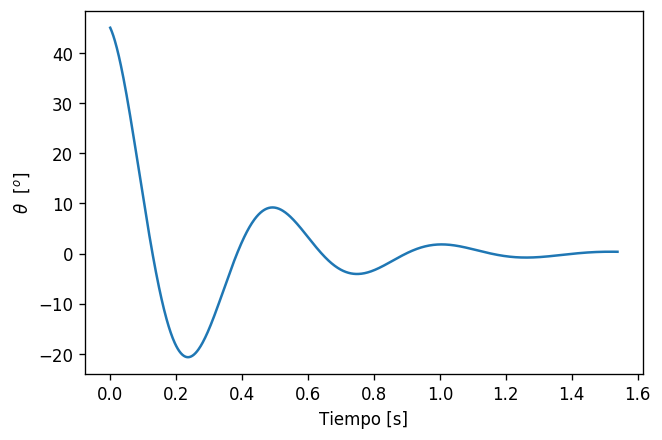

In [3]:
plt.figure(dpi=120)
plt.plot(t, theta*180/np.pi)
plt.xlabel('Tiempo [s]')
plt.ylabel(r'$\theta$  $[^o]$')

### 1.2. Movimiento críticamente amortiguado, $\omega = \beta$

In [0]:
t = np.linspace(0, 5/beta, 1000)
theta_0 = np.pi/4 # rad
theta = theta_0*np.exp(-beta*t)

Text(0, 0.5, '$\\theta$  $[^o]$')

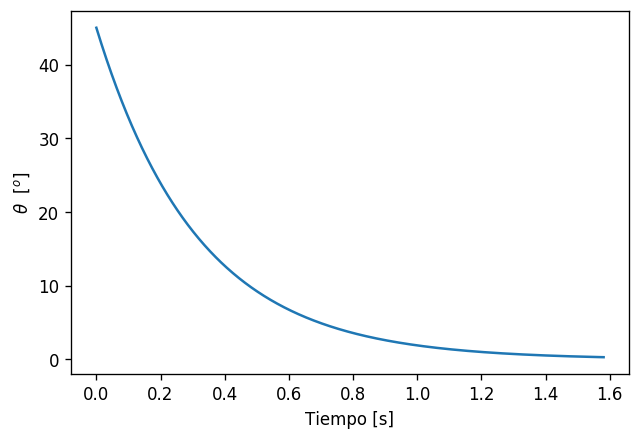

In [5]:
plt.figure(dpi=120)
plt.plot(t, theta*180/np.pi)
plt.xlabel('Tiempo [s]')
plt.ylabel(r'$\theta$  $[^o]$')

### 1.3. Movimiento sobre-amortiguado, $\omega_0 < \beta$

In [0]:
beta = 3*w0
theta_1 = theta_0/3
theta_2 = 2*theta_0/3
s_1 = -beta + np.sqrt(beta**2-w0**2)
s_2 = -beta - np.sqrt(beta**2-w0**2)

theta = theta_1*np.exp(s_1*t) + theta_2*np.exp(s_2*t)

Text(0, 0.5, '$\\theta$  $[^o]$')

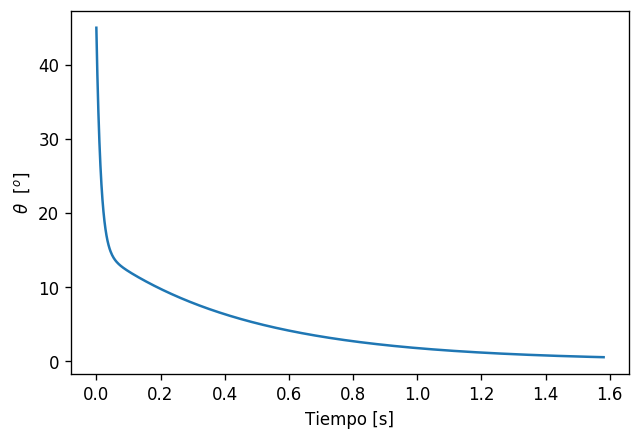

In [7]:
plt.figure(dpi=120)
plt.plot(t, theta*180/np.pi)
plt.xlabel('Tiempo [s]')
plt.ylabel(r'$\theta$  $[^o]$')

<h2>2. Movimiento forzado</h2>
En este caso el sistema es perturbado por una fuerza externa $f(t)$ que lo excita y la ecuación diferencial que describe el sistema será:

$$\frac{d^2\theta}{dt^2} + \beta\frac{d\theta}{dt} + \omega^2\theta = f(t)$$

Si $f(t) = F_0cos(\omega_f t)$, entones, la solución de la ecuación estará dada por dos componentes, una de estado estacionario $\theta_s$ y otra homogenea $\theta_h$:

$$\theta_h(t)=\theta_+ e^{s_+t}+\theta_-e^{s_-t}$$

$$\theta_s(t)=A_fcos(\omega_f t + \delta)$$
Donde,

$$s_{\pm} = -\beta \pm \sqrt{\beta^2-\omega_o^2}$$

Al reemplazar $\theta_s(t)$ en la ecuación diferencial se obtiene la ecuación para estado estacionario,

$$\frac{d^2\theta_s}{dt^2} + \beta\frac{d\theta_s}{dt} + \omega^2\theta_s = f(t)$$

Al resolver las derivadas y la ecuación algebráica se obtiene,

$$A_f = \frac{F_0}{\sqrt{(\omega_f^2-\omega_0^2)^2+\beta^2\omega_f^2}}$$

$$tan(\delta) = \frac{2\beta\omega_f}{\omega_f^2-\omega_0^2}$$

In [0]:
F0 = np.pi/4

w_f = np.logspace(0, 2,1000)
def A_f(w_f, F0=F0, w0=w0, beta=beta):
    return F0/np.sqrt((w_f**2 - w0**2)**2+beta**2*w_f**2)
def delta(w_f, F0=F0, w0=w0, beta=beta):
    return np.arctan(2*beta*w_f/(w_f**2 - w0**2))

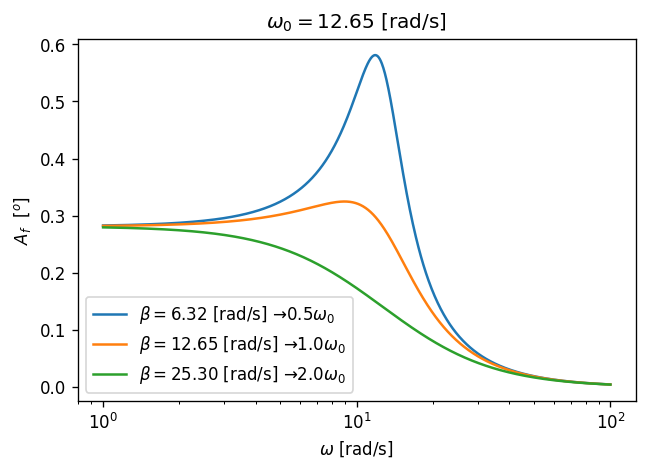

In [9]:
plt.figure(dpi=120)
k_fig = 0
beta_values = [w0/2, w0, 2*w0]
for beta in beta_values:
    k_fig += 1
    label = r'$\beta=%0.2f$ [rad/s] $\to %0.1f\omega_0$' % (beta, beta/w0)
    plt.semilogx(w_f, 180*A_f(w_f, beta=beta)/np.pi, label=label)
    plt.xlabel('$\omega$ [rad/s]')
    plt.ylabel(r'$A_f$  $[^o]$')
plt.title(r'$\omega_0=%0.2f$ [rad/s]' % w0)
plt.legend()

Text(0.5, 1.0, '$\\omega_0=12.65$ [rad/s]')

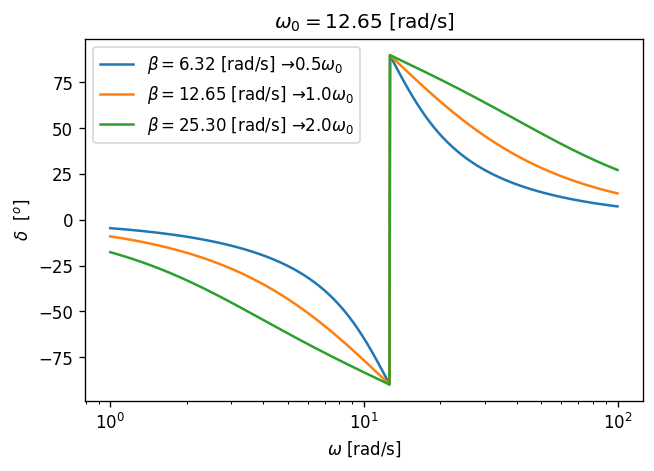

In [10]:
plt.figure(dpi=120)
for beta in beta_values:
    k_fig += 1
    label = r'$\beta=%0.2f$ [rad/s] $\to %0.1f\omega_0$' % (beta, beta/w0)
    plt.semilogx(w_f, 180*delta(w_f, beta=beta)/np.pi, label=label)
    plt.xlabel('Tiempo [s]')
    plt.ylabel(r'$A_f$  $[^o]$')
plt.legend()
plt.xlabel('$\omega$ [rad/s]')
plt.ylabel(r'$\delta$  $[^o]$')
plt.title(r'$\omega_0=%0.2f$ [rad/s]' % w0)

The end, by the moment!